In [1]:
import pandas as pd
import yfinance as yf

stocks = [
    "ITUB4.SA",   # Bancos / Financeiro
    "WEGE3.SA",   # Indústria (WEG)
    "RADL3.SA",   # Petróleo & Gás (PetroRio)
    "QUAL3.SA",   # Qualicorp (Saúde)
]
# iniciar os retornos
all_stock_returns = pd.DataFrame()

for stock in stocks:
    data = yf.Ticker(stock)
    start_date = "2024-01-01" ### melhorar o intervalo
    end_date = "2024-12-31"  
    data = data.history(start=start_date, end=end_date)

    data['returns'] = data['Close'].pct_change()
    
    # adicionar os retornos ao data frame
    all_stock_returns[stock] = data['returns']

# tirar os NAs em cima dos retornos, a primeira linha, por exemplo. 
all_stock_returns = all_stock_returns.dropna()

print(all_stock_returns)


                           ITUB4.SA  WEGE3.SA  RADL3.SA  QUAL3.SA
Date                                                             
2024-01-03 00:00:00-03:00 -0.011039  0.007657 -0.000342  0.015480
2024-01-04 00:00:00-03:00 -0.006637 -0.013297  0.002397 -0.042683
2024-01-05 00:00:00-03:00  0.023383 -0.010726  0.007858  0.044586
2024-01-08 00:00:00-03:00 -0.010683  0.002502 -0.011186  0.012195
2024-01-09 00:00:00-03:00 -0.000600 -0.024681 -0.005142 -0.018072
...                             ...       ...       ...       ...
2024-12-20 00:00:00-03:00  0.011561 -0.016295  0.002644 -0.050847
2024-12-23 00:00:00-03:00 -0.019365 -0.022002 -0.005714 -0.065476
2024-12-26 00:00:00-03:00  0.006475  0.007743 -0.003537  0.012739
2024-12-27 00:00:00-03:00 -0.009971 -0.017929 -0.023957 -0.031447
2024-12-30 00:00:00-03:00 -0.001625 -0.016952  0.000000 -0.012987

[250 rows x 4 columns]


Explorando as estatisticas
https://www.statsmodels.org/stable/index.html vale a consulta


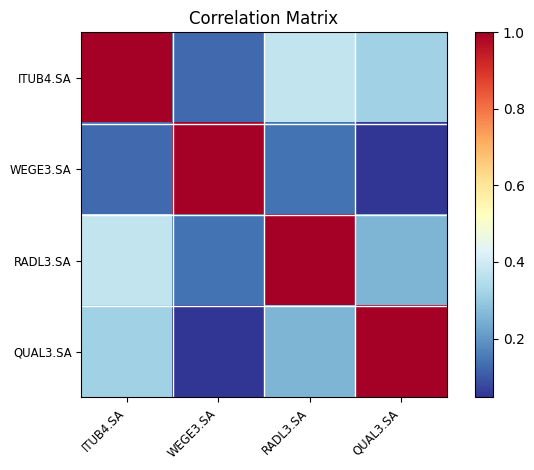

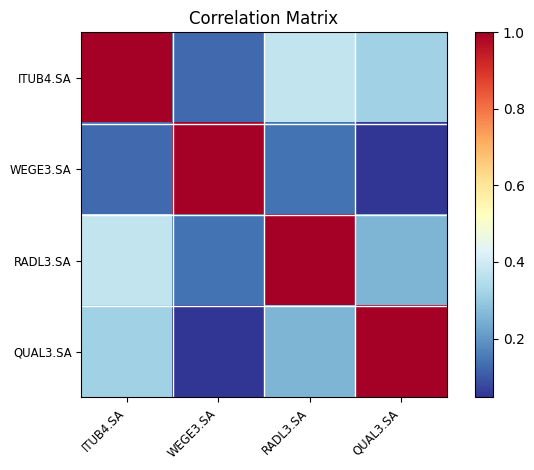

In [2]:
from statsmodels import api as sm

correlation = all_stock_returns.corr()

sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))

<Axes: >

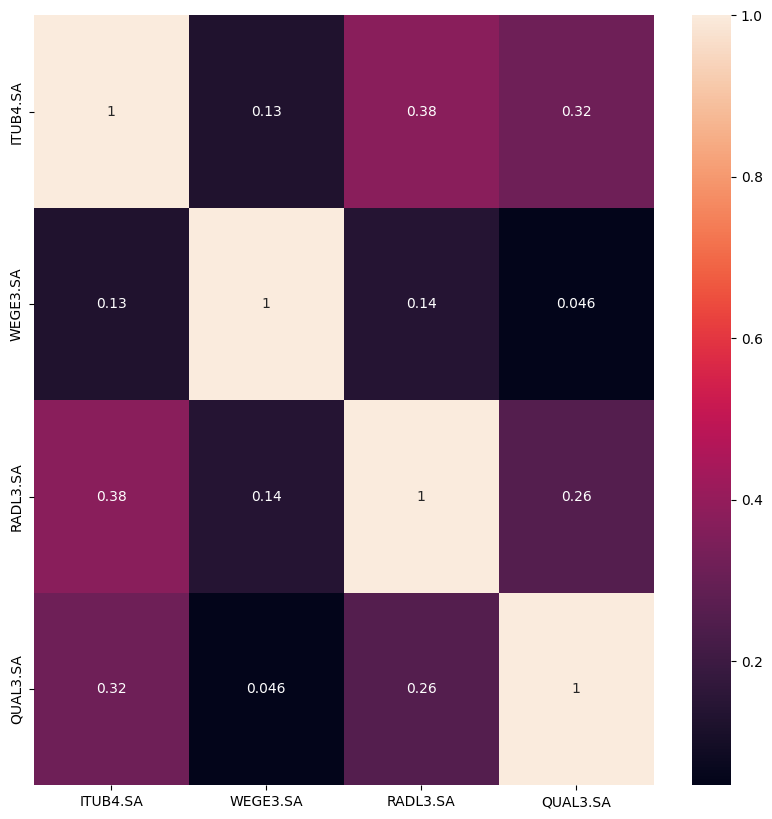

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 10))
sns.heatmap(all_stock_returns.corr(), annot=True)

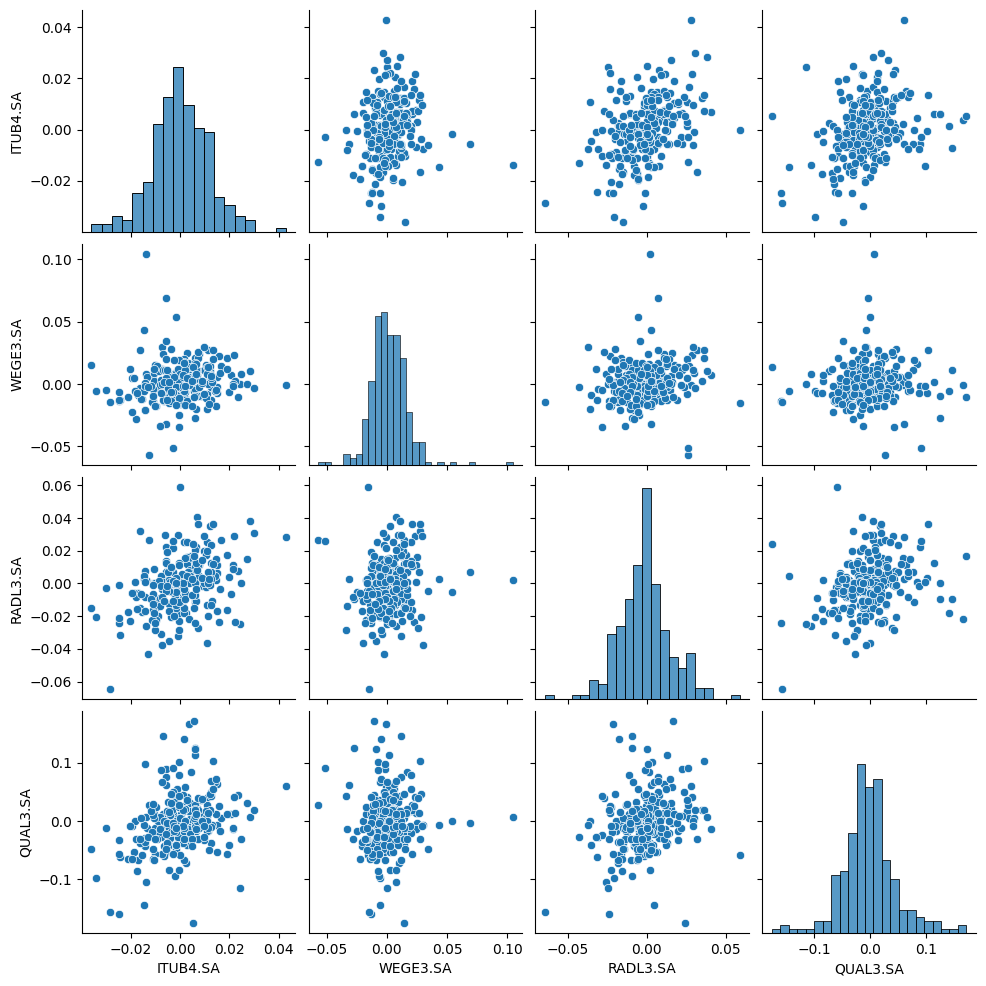

In [4]:
import seaborn as sns
sns.pairplot(all_stock_returns, kind="scatter")

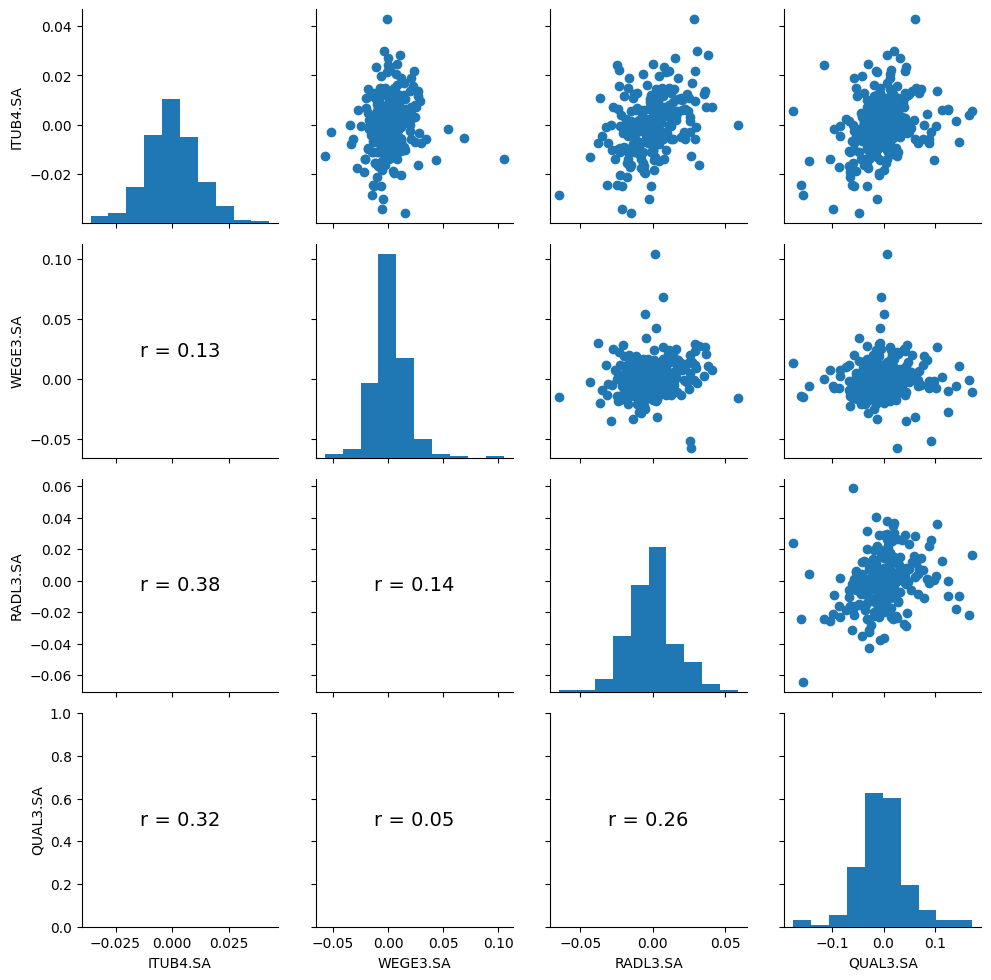

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# claculo da correlacao e imprimir no gráfico
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"r = {r:.2f}",
                xy=(.5, .5), 
                xycoords=ax.transAxes,
                ha='center',
                va='center',
                fontsize=14,
                color="black")

## criar o grid para impressao
grid = sns.PairGrid(all_stock_returns)

## colocar os gráficos de dispersao acima da diagonal superior
grid.map_upper(plt.scatter)

## colocar as correlacoes na diagonal inferior 
grid.map_lower(corr_func)

## histograma na diagonal principal
grid.map_diag(plt.hist)

plt.show()


tickers = ['PETR3.SA', 'VALE3.SA', 'BBAS3.SA', 'ITUB4.SA', 'SUZB3.SA', 
           'ABEV3.SA', 'GGBR4.SA', 'PRIO3.SA', 'BBDC4.SA', 'BBSE3.SA', 
           'HYPE3.SA', 'MULT3.SA', 'RAIZ4.SA', 'ELET3.SA', 'CIEL3.SA', 
           'CPFE3.SA', 'EQTL3.SA', 'RENT3.SA', 'ASAI3.SA', 'SBSP3.SA'] 

